<div align="center"> <font size=6, color='blue'> <br> Machine Learning on Penguins Data</font></div>


<div align="center"> <font size=3, color='blue'>
By: Gabriela Liera <br>
    CISB 60 Fall 2021</font></div>

# Introduction


This project will load a dataset, clean and prepare data, implement several supervised learning models, and pick the best model given the dataset. 

The data folder contains one cvs file

* penguins_size.csv: Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex




# Importing required libraries

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#set default Seaborn style
sns.set()

#To display graphs and save them in Jupyter Notebook
%matplotlib inline

#Code to hide warning messages in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Library to split data set into train and test
from sklearn.model_selection import train_test_split

#Scale data
from sklearn.preprocessing import StandardScaler

#Logistic Regession
from sklearn.linear_model import LogisticRegression

#SVM
from sklearn import svm

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Cross Validate Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV


In [3]:
#Library to save final model
import joblib

## Load Data

In [4]:
# Read the penguins csv file and load into a dataframe called df
df = pd.read_csv("./data/penguins_size.csv")

## Exploratory data analysis

In [5]:
#Display the first 5 rows of the df dataframe
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
#Display the last 5 rows of the df dataframe
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [7]:
# Display the number of rows and columns in the dataframe by using shape
df.shape

(344, 7)

In [8]:
# Display the column names on a separate line for better readability
for col in df:
    print(col)

species
island
culmen_length_mm
culmen_depth_mm
flipper_length_mm
body_mass_g
sex


In [9]:
# Display detailed information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**In this dataset there are 343 rows, 7 columns and:**
<br>
 - **5  columns with numerical values (float)** 
 - **3 columns with categorical values**
 - **Some null values within dataset**

### Exploring Numerical Data

In [10]:
#Display descriptive statistics of dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


### Exploring Categorical Data (Objects)

In [11]:
#Describe all the categorical columns, which are objects
df.describe(include=['object'])

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


In [12]:
# Display unique values in species column 
df['species'].value_counts().to_frame()

,species
Adelie,152
Gentoo,124
Chinstrap,68


In [13]:
# Display unique values in species column 
df['island'].value_counts().to_frame()

,island
Biscoe,168
Dream,124
Torgersen,52


In [14]:
# Display unique values in species column 
df['sex'].value_counts().to_frame()

,sex
MALE,168
FEMALE,165
.,1


In [15]:
#Find the row with sex type "."
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


**Lets get rid of the single sex type "."**

In [16]:
#Create new datagrame without "." sex value
df = df[df['sex']!='.']

#Display unqiue values in sex column
df['sex'].value_counts().to_frame()

,sex
MALE,168
FEMALE,165


## Data Preparation

### Missing Data

In [17]:
# Find which columns contain null values
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [18]:
# Find the rows that contain 10 null values
dfnan = df[df.isna().any(axis=1)]

#Display all rows with NaN
dfnan

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Row 3 and 339 are all nan-values so we will drop them. The other rows are only missing sex. We could guess the sex based on the average measurements of other features; however, this introduces more error. Since these 10 rows represent 2.90% of the dataset, it is better to drop the rows entirely.

In [19]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [20]:
#Drop nan value 
df = df.dropna()

In [21]:
#Show that dataframe doesn't contain null values
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Visualization

#### Culmen Length mm- the upper ridge of a bird's beak

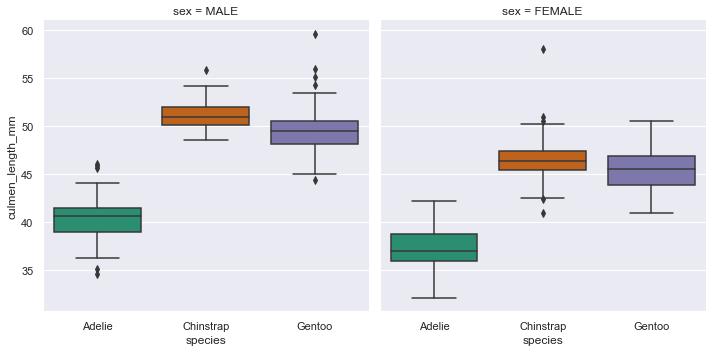

In [22]:
#Disply boxplot for culmen_length_mm to check for outliers
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

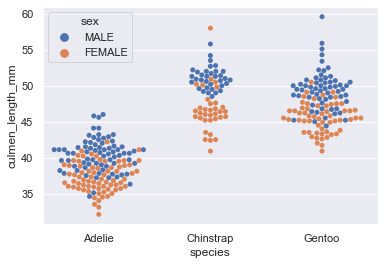

In [23]:
#Display swarmplot to see the distrution of sex for each species based on culmen_length_mm
sns.swarmplot(x='species', y='culmen_length_mm', data=df, hue='sex')

#### Culmen Depth mm

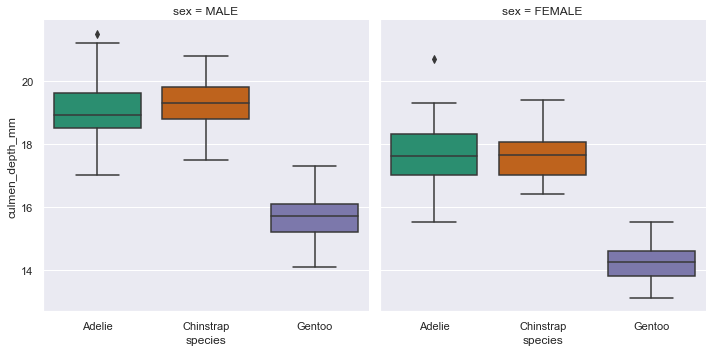

In [27]:
#Disply boxplot for culmen_depth to check for outliers
sns.catplot(x='species',y='culmen_depth_mm',data=df,kind='box',col='sex',palette='Dark2')

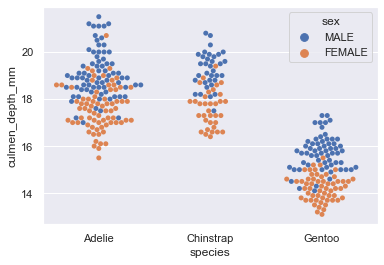

In [28]:
#Display swarmplot to see the distrution of sex for each species based on culmen_depth_mm
sns.swarmplot(x='species', y='culmen_depth_mm', data=df, hue='sex')

#### Flipper Length mm

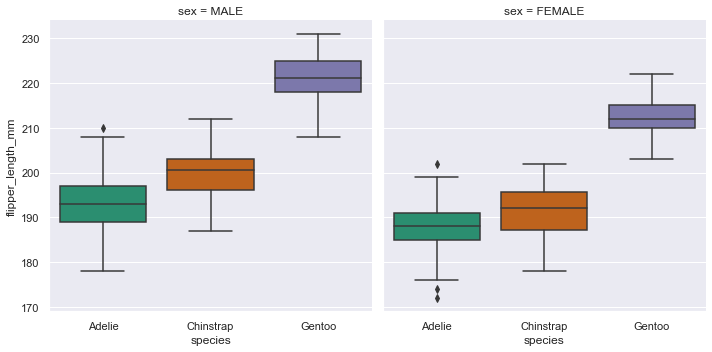

In [30]:
#Disply boxplot for flipper_length_mm to check for outliers
sns.catplot(x='species',y='flipper_length_mm',data=df,kind='box',col='sex',palette='Dark2')

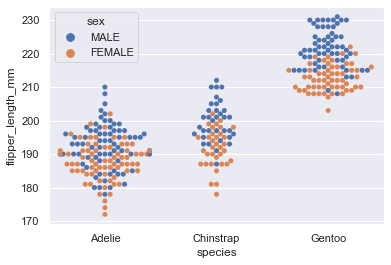

In [31]:
#Display swarmplot to see the distrution of sex for each species based on flipper_length_mm
sns.swarmplot(x='species', y='flipper_length_mm', data=df, hue='sex')

#### Body Mass G

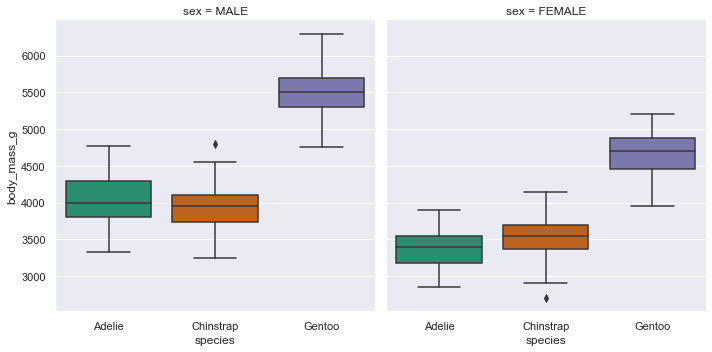

In [32]:
#Disply boxplot for body_mass_g to check for outliers
sns.catplot(x='species',y='body_mass_g',data=df,kind='box',col='sex',palette='Dark2')

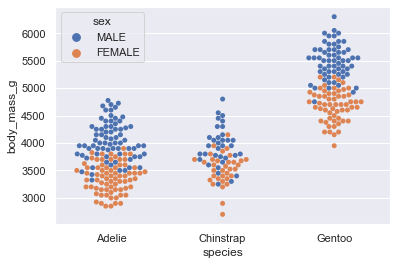

In [33]:
#Display swarmplot to see the distrution of sex for each species based on body_mass_g
sns.swarmplot(x='species', y='body_mass_g', data=df, hue='sex')

Generally for all numerical features, males are larger than females. In addition, all features do not have many outliers.

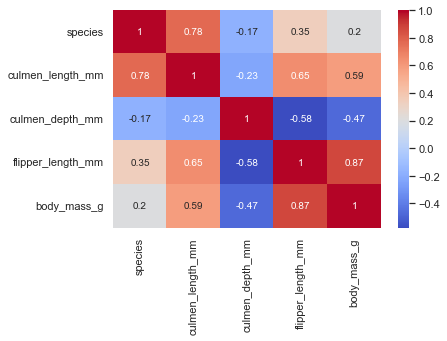

In [34]:
#Generate heat map with maping of species
dfcopy =df.copy()
dfcopy['species']= dfcopy['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

sns.heatmap(dfcopy.corr(), cmap='coolwarm', annot=True)

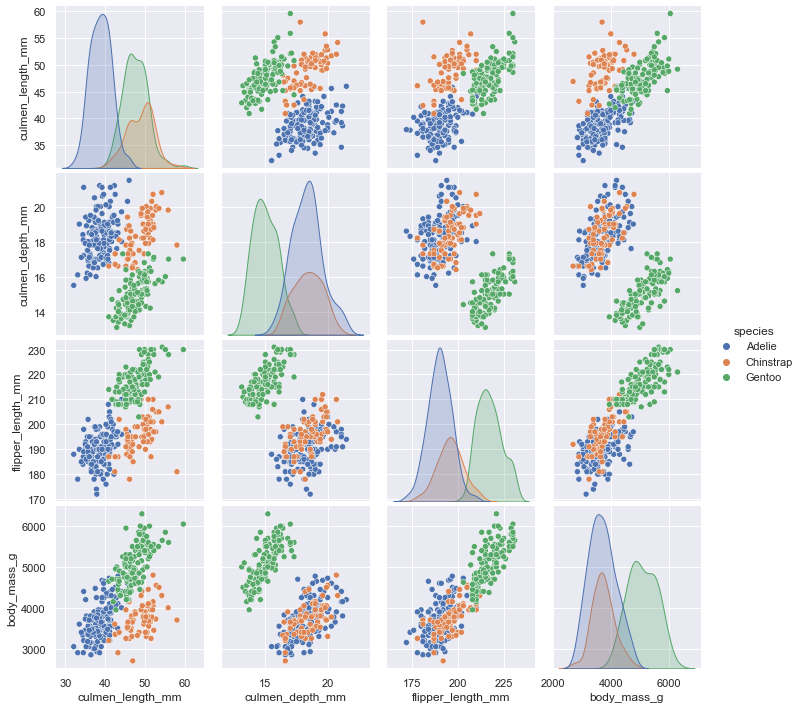

In [35]:
sns.pairplot(df,hue='species')

## Feature Engineering

In [36]:
#Map sex column into numerical categories.
df['sex']= df['sex'].map({'MALE':0,'FEMALE':1})

#Display new mapping
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [37]:
#Map island column into numerical categories
df['island']= df['island'].map({'Torgersen':0,'Dream':1,'Biscoe':2})

#Display new mapping
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0
1,Adelie,0,39.5,17.4,186.0,3800.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1
4,Adelie,0,36.7,19.3,193.0,3450.0,1
5,Adelie,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,2,47.2,13.7,214.0,4925.0,1
340,Gentoo,2,46.8,14.3,215.0,4850.0,1
341,Gentoo,2,50.4,15.7,222.0,5750.0,0
342,Gentoo,2,45.2,14.8,212.0,5200.0,1


# Train | Test Split

### Create X and y dataframe

In [38]:
# The features for our models are represented by X
X = df.drop('species',axis=1)
#Display X
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
4,0,36.7,19.3,193.0,3450.0,1
5,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0,1
340,2,46.8,14.3,215.0,4850.0,1
341,2,50.4,15.7,222.0,5750.0,0
342,2,45.2,14.8,212.0,5200.0,1


In [39]:
#Create y dataframe which will represent the category our model will try to guess correctly
y = df['species']

#Display y
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

### Train_Test_Split

In [40]:
#Library to split data into train and test
from sklearn.model_selection import train_test_split

In [41]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
#Display X_train
X_train


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
193,1,46.2,17.5,187.0,3650.0,1
22,2,35.9,19.2,189.0,3800.0,1
92,1,34.0,17.1,185.0,3400.0,1
225,2,46.5,13.5,210.0,4550.0,1
115,2,42.7,18.3,196.0,4075.0,0
...,...,...,...,...,...,...
81,0,42.9,17.6,196.0,4700.0,0
93,1,39.6,18.1,186.0,4450.0,0
69,0,41.8,19.4,198.0,4450.0,0
335,2,55.1,16.0,230.0,5850.0,0


In [43]:
#Display X_test
X_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
171,1,49.2,18.2,195.0,4400.0,0
250,2,47.3,15.3,222.0,5250.0,0
140,1,40.2,17.1,193.0,3400.0,1
130,0,38.5,17.9,190.0,3325.0,1
214,1,45.7,17.0,195.0,3650.0,1
...,...,...,...,...,...,...
231,2,49.0,16.1,216.0,5550.0,0
89,1,38.9,18.8,190.0,3600.0,1
237,2,49.2,15.2,221.0,6300.0,0
23,2,38.2,18.1,185.0,3950.0,0


### Scaling

In [48]:
#Import scaling library
from sklearn.preprocessing import StandardScaler

In [49]:
#Create model to scale X feature
scaler = StandardScaler()

In [50]:
#Make new dataframe for scaled features
X_train = X_train.copy()

#Make list of columns name that will be scaled
col_names = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']

features = X_train[col_names]

#Scale column 
X_train[col_names] = scaler.fit_transform(features.values)

#Display new scaled data
X_train

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
193,1,0.417487,0.185429,-0.988242,-0.722413,1
22,2,-1.465834,1.055671,-0.847237,-0.536661,1
92,1,-1.813242,-0.019334,-1.129246,-1.031999,1
225,2,0.472341,-1.862199,0.633310,0.392099,1
115,2,-0.222476,0.594955,-0.353722,-0.196116,0
...,...,...,...,...,...,...
81,0,-0.185907,0.236620,-0.353722,0.577851,0
93,1,-0.789301,0.492573,-1.058744,0.268264,0
69,0,-0.387038,1.158052,-0.212717,0.268264,0
335,2,2.044822,-0.582431,2.043355,2.001948,0


In [51]:
# Scale the X_test dataframe so all numeric features are scaled the same
X_test = X_test.copy()
#Make list of columns name that will be scaled
col_names = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
features = X_test[col_names]

#Transform X_test
X_test[col_names] = scaler.transform(features.values)

#Display new X_test
X_test

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
171,1,0.966027,0.543764,-0.424224,0.206347,0
250,2,0.618618,-0.940766,1.479337,1.258941,0
140,1,-0.679593,-0.019334,-0.565228,-1.031999,1
130,0,-0.990432,0.390192,-0.776735,-1.124875,1
214,1,0.326063,-0.070525,-0.424224,-0.722413,1
...,...,...,...,...,...,...
231,2,0.929457,-0.531241,1.056323,1.630445,0
89,1,-0.917294,0.850908,-0.776735,-0.784330,1
237,2,0.966027,-0.991957,1.408835,2.559204,0
23,2,-1.045286,0.492573,-1.129246,-0.350909,0


## Implementation of Several Models

## 1. Support Vector Classifier

In [52]:
#import library
from sklearn.svm import SVC

#Create SVC model
svm = SVC()

#### Fit/Train Mode on X_Train

In [53]:
#Train svm model
svm.fit(X_train, y_train)

SVC()

#### Predictions and Evaluations

In [54]:
#Find predictions
SVMpredictions = svm.predict(X_test)

In [55]:
#Import libraries for classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

#Print Confusion matrix
print(confusion_matrix(y_test,SVMpredictions))

[[40  0  0]
 [ 1 26  0]
 [ 0  0 33]]


In [56]:
#Print Classification report
print(classification_report(y_test, SVMpredictions))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [57]:
#Find score of SVM model
svm.score(X_test, y_test)

0.99

## 2. Logistic Regression

In [58]:
#Create Logistic Regression model
lr = LogisticRegression()

#### Fit/Train Mode on X_Train

In [59]:
#Fit/Train model on X Train data
lr.fit(X_train, y_train)

LogisticRegression()

#### Predictions and Evaluate of Model on X_Test Data

In [60]:
#Find the predictions of model based on X_test_scaled
LRprediction = lr.predict(X_test)

#Display predictions
LRprediction

array(['Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie',

In [61]:
#Print Confusion matrix
print(confusion_matrix(y_test,LRprediction))

[[40  0  0]
 [ 1 26  0]
 [ 0  0 33]]


In [62]:
#Print Classification report
print(classification_report(y_test, LRprediction))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [63]:
#Find score of LR model
lr.score(X_test, y_test)

0.99

### Cross Validation Score

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
#Use cross_val_score - syntax cross_val_score(estimator, x,y, cv=5)
l_scores = cross_val_score(lr, X_train,y_train, cv=3)

#Find average of scores
np.average(l_scores)

0.9914529914529915

### Cross Validate

In [66]:
from sklearn.model_selection import cross_validate

In [67]:
#Use cross_validate - syntax cross_val_score(estimator, X,y)
l_scores = cross_validate(lr, X_train,y_train)

#Find average of scores
pd.DataFrame(l_scores).mean()

fit_time      0.031717
score_time    0.004785
test_score    0.991489
dtype: float64

## Grid Search Technique

In [68]:
#Required libraries
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Create a dictionary that includes the models and hyperparameters

model_params =  { 
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
                }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
                }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
                }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }   
}

In [69]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [70]:
#Create an empty list to save the scores

scores=[]

for model_name, mp in model_params.items():
        clf = GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)
        clf.fit(X_train,y_train)
        scores.append({
            'model': model_name,
            'best_score':clf.best_score_,
            'best_params': clf.best_params_
        })

In [71]:
#Create a dataframe from the result
df_Models = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [72]:
#Display dataframe
df_Models

,model,best_score,best_params
0,svm,1.000000,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.995745,{'n_estimators': 10}
2,logistic_regression,0.995745,{'C': 5}
3,decision_tree,0.974191,{'criterion': 'entropy'}


## Select Final Model

In [73]:
#Create final model using best parameters fould during grid search  
final_model = SVC(C=10,kernel='linear')

In [74]:
#Fit the final model with all the data
final_model.fit(X,y)

SVC(C=10, kernel='linear')

## Saving Model

In [75]:
#Import library to save model
import joblib

In [76]:
#Save final model as final_model.pk1 file
joblib.dump(final_model,'model.pkl')

['model.pkl']

In [77]:
#We are also going to save that column data
#You will see these pickle files in the current directory
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']